In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

In [ ]:
def sim(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        tokens[1] = float(tokens[1])
        tokens[0] = float(tokens[0])
        diff = tokens[1] - tokens[0]
        rdm1 = tokens[0] + diff * np.random.uniform(0,1)
        rdm2 = tokens[0] + diff * np.random.uniform(0,1)
        rdm3 = tokens[0] + diff * np.random.uniform(0,1)
        av_rdm = (rdm1+rdm2+rdm3)/3
        return av_rdm
    try:
        return float(x)
    except:
        return None


# Exploratory Data Analysis



## Sector distribution




## Salary vs Location

In [ ]:
df_ds = pd.read_excel('DataScientist.xlsx')
df_de = pd.read_excel('DataEngineer.xlsx')
df_da = pd.read_excel('DataAnalyst.xlsx')
df_ba = pd.read_excel('BusinessAnalyst.xlsx')
df = df_ds.append(df_de)
df = df.append(df_da)
df = df.dropna()
df.reset_index(drop=True, inplace=True)
# df.index = range(0, len(df))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11875 entries, 0 to 11874
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          11875 non-null  object 
 1   Salary Estimate    11875 non-null  object 
 2   Job Description    11875 non-null  object 
 3   Rating             11875 non-null  float64
 4   Company Name       11875 non-null  object 
 5   Location           11875 non-null  object 
 6   Headquarters       11875 non-null  object 
 7   Size               11875 non-null  object 
 8   Founded            11875 non-null  int64  
 9   Type of ownership  11875 non-null  object 
 10  Industry           11875 non-null  object 
 11  Sector             11875 non-null  object 
 12  Revenue            11875 non-null  object 
 13  Competitors        11875 non-null  object 
 14  Easy Apply         11875 non-null  int64  
dtypes: float64(1), int64(2), object(12)
memory usage: 1.4+ MB


In [ ]:
df.rename(columns = {'Type of ownership':'Ownership','Salary Estimate':'Salary'}, inplace = True)
df['Salary'] = df['Salary'].apply(lambda x:x.split()[0])
df['Salary'] = df['Salary'].apply(lambda x:x.replace('$',''))
df['Salary'] = df['Salary'].apply(lambda x:x.replace('K',' '))
df['Salary'] = df['Salary'].apply(lambda x:x.replace('(Employer',' '))
df['Salary'] = df['Salary'].apply(sim)
df.head()

,Job Title,Salary,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Senior Data Scientist,137.029538,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,"Data Scientist, Product Analytics",151.359034,"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,Data Science Manager,159.760313,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,1
3,Data Analyst,122.803135,Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,"Director, Data Science",166.539495,"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [ ]:
city_state = df['Location'].str.split(',')
df['Location_state'] = np.nan
df['Location_city'] = np.nan
for i in range(len(city_state)):
  try:
    df.loc[i,'Location_state'] = city_state[i][1].strip()
    df.loc[i,'Location_city'] = city_state[i][0].strip()
  except:
    continue
df = df.dropna()
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Job Title        11746 non-null  object 
 1   Salary           11746 non-null  float64
 2   Job Description  11746 non-null  object 
 3   Rating           11746 non-null  float64
 4   Company Name     11746 non-null  object 
 5   Location         11746 non-null  object 
 6   Headquarters     11746 non-null  object 
 7   Size             11746 non-null  object 
 8   Founded          11746 non-null  int64  
 9   Ownership        11746 non-null  object 
 10  Industry         11746 non-null  object 
 11  Sector           11746 non-null  object 
 12  Revenue          11746 non-null  object 
 13  Competitors      11746 non-null  object 
 14  Easy Apply       11746 non-null  int64  
 15  Location_state   11746 non-null  object 
 16  Location_city    11746 non-null  object 
dtypes: float64(2

In [ ]:
state_groups = df.groupby('Location_state')
state_mean_salary = state_groups.mean('Salary')
state_mean_salary = state_mean_salary.reset_index()
state_mean_salary[['Location_state', 'Salary']]
state_mean_salary = state_mean_salary[state_mean_salary['Location_state'] != 'United Kingdom']
state_mean_salary

,Location_state,Salary,Rating,Founded,Easy Apply
0,AK,59.270472,3.625000,1477.000000,-1.000000
1,AZ,91.976522,3.267305,1545.180223,-0.968102
2,Anne Arundel,67.411897,4.000000,1998.000000,-1.000000
3,Arapahoe,71.587426,3.900000,1742.375000,-0.500000
4,CA,114.919292,3.344648,1524.234709,-0.885321
5,CO,72.932065,3.481690,1535.514085,-0.887324
6,Cuyahoga,57.460369,1.840000,1183.400000,-1.000000
7,DC,76.414897,3.148980,1347.586735,-0.969388
8,DE,97.502114,3.234211,1586.421053,-1.000000
9,FL,65.215486,3.279863,1316.871854,-0.995423


In [ ]:
state_mean_salary.sort_values('Salary', ascending=False)

,Location_state,Salary,Rating,Founded,Easy Apply
4,CA,114.919292,3.344648,1524.234709,-0.885321
32,OR,100.003260,3.104444,1414.844444,-0.866667
29,NY,97.653286,3.170790,1419.937630,-0.860707
8,DE,97.502114,3.234211,1586.421053,-1.000000
1,AZ,91.976522,3.267305,1545.180223,-0.968102
33,PA,87.765020,3.279704,1368.672593,-0.925926
13,IL,87.342069,3.267141,1571.172057,-0.849935
36,TX,86.147957,3.260844,1446.474891,-0.944687
40,WA,82.480542,3.379021,1483.370629,-0.972028
26,NJ,82.397617,3.191093,1337.599190,-0.951417


In [ ]:
import folium
m = folium.Map(location=[40.2075,-96.1005],zoom_start= 5)
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"

m.choropleth(
    geo_data=state_geo,
    data=state_mean_salary,
    columns=["Location_state", "Salary"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Salary level",
)
folium.LayerControl().add_to(m)
m.save('salary_level.html')
m

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


# Clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('DataScientist.xlsx')
df.rename(columns = {'Type of ownership':'Ownership','Salary Estimate':'Salary'}, inplace = True)
df['Salary'] = df['Salary'].apply(lambda x:x.split()[0])
df['Salary'] = df['Salary'].apply(lambda x:x.replace('$',''))
df['Salary'] = df['Salary'].apply(lambda x:x.replace('K',' '))
df['Salary'] = df['Salary'].apply(lambda x:x.replace('(Employer',' '))
df['Salary'] = df['Salary'].apply(sim)
city_state = df['Location'].str.split(',')
df['Location_state'] = np.nan
df['Location_city'] = np.nan
for i in range(len(city_state)):
  try:
    df.loc[i,'Location_state'] = city_state[i][1].strip()
    df.loc[i,'Location_city'] = city_state[i][0].strip()
  except:
    continue
df = df[df['Rating'] != -1]
df = df[df['Sector'] != -1]
df = df[df['Size'] != 'Unknown']
df['Size'] = df['Size'].replace(['1 to 50 employees', '51 to 200 employees', '201 to 500 employees', '501 to 1000 employees', '1001 to 5000 employees', '5001 to 10000 employees', '10000+ employees'], 
                                [25, 125, 350, 750, 3000, 7500, 20000])
df = df.dropna()
df.reset_index(inplace=True, drop=True)
df_cluster = df[['Salary', 'Rating', 'Location_state', 'Size', 'Ownership', 'Sector']]

In [ ]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Salary          3286 non-null   float64
 1   Rating          3286 non-null   float64
 2   Location_state  3286 non-null   object 
 3   Size            3286 non-null   int64  
 4   Ownership       3286 non-null   object 
 5   Sector          3286 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 154.2+ KB


In [ ]:
# one-hot encoding
df_norm = pd.get_dummies(df_cluster, columns=["Location_state", "Ownership", "Sector"])

In [ ]:
df_norm.head()

,Salary,Rating,Size,Location_state_AZ,Location_state_CA,Location_state_DE,Location_state_FL,Location_state_IL,Location_state_NJ,Location_state_NY,...,Sector_Media,Sector_Mining & Metals,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,"Sector_Restaurants, Bars & Food Services",Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism
0,126.638606,3.5,750,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,146.717246,4.5,3000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,139.365939,3.4,350,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,148.061263,3.4,125,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,151.793277,2.9,350,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df_norm)

In [ ]:
pca = PCA()
pca.fit(df_std)

PCA()

Text(0, 0.5, 'Cumulative explained variance')

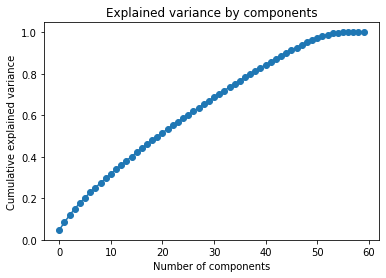

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(0,len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_.cumsum(), marker="o")
plt.title("Explained variance by components")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")

In [ ]:
pca = PCA(n_components=10)
pca.fit(df_std)
scores_pca = pca.transform(df_std)

In [ ]:
wcss = []
for i in range(1, 21):
  kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=66)
  kmeans_pca.fit(scores_pca)
  wcss.append(kmeans_pca.inertia_)

Text(0.5, 1.0, 'K-means with PCA')

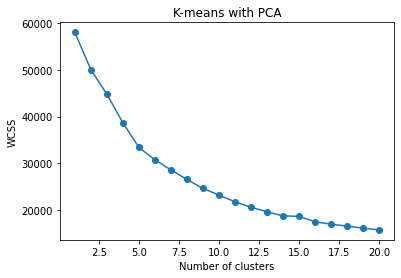

In [ ]:
plt.plot(range(1,21), wcss, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("K-means with PCA")

In [ ]:
kmeans_pca = KMeans(n_clusters=5, init="k-means++", random_state=66)
kmeans_pca.fit(scores_pca)

In [ ]:
## K-prototype clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('DataScientist.xlsx')
df.rename(columns = {'Type of ownership':'Ownership','Salary Estimate':'Salary'}, inplace = True)
df['Salary'] = df['Salary'].apply(lambda x:x.split()[0])
df['Salary'] = df['Salary'].apply(lambda x:x.replace('$',''))
df['Salary'] = df['Salary'].apply(lambda x:x.replace('K',' '))
df['Salary'] = df['Salary'].apply(lambda x:x.replace('(Employer',' '))
df['Salary'] = df['Salary'].apply(sim)
city_state = df['Location'].str.split(',')
df['Location_state'] = np.nan
df['Location_city'] = np.nan
for i in range(len(city_state)):
  try:
    df.loc[i,'Location_state'] = city_state[i][1].strip()
    df.loc[i,'Location_city'] = city_state[i][0].strip()
  except:
    continue
df = df.dropna()
df = df[df['Rating'] != -1]
df = df[df['Sector'] != -1]
df = df[df['Size'] != 'Unknown']
df['Size'] = df['Size'].replace(['1 to 50 employees', '51 to 200 employees', '201 to 500 employees', '501 to 1000 employees', '1001 to 5000 employees', '5001 to 10000 employees', '10000+ employees'], 
                                [25, 125, 350, 750, 3000, 7500, 20000])
df.reset_index(inplace=True, drop=True)
df_cluster = df[['Salary', 'Rating', 'Location_state', 'Size', 'Ownership', 'Sector']]

In [ ]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Salary          3286 non-null   float64
 1   Rating          3286 non-null   float64
 2   Location_state  3286 non-null   object 
 3   Size            3286 non-null   int64  
 4   Ownership       3286 non-null   object 
 5   Sector          3286 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 154.2+ KB


In [ ]:
# !pip install kmodes

In [ ]:
from kmodes.kprototypes import KPrototypes
from sklearn import preprocessing
df_cluster_norm = df_cluster.copy()
scaler = preprocessing.MinMaxScaler()
df_cluster_norm[['Salary','Rating','Size']] = scaler.fit_transform(df_cluster_norm[['Salary','Rating','Size']])

<function matplotlib.pyplot.show>

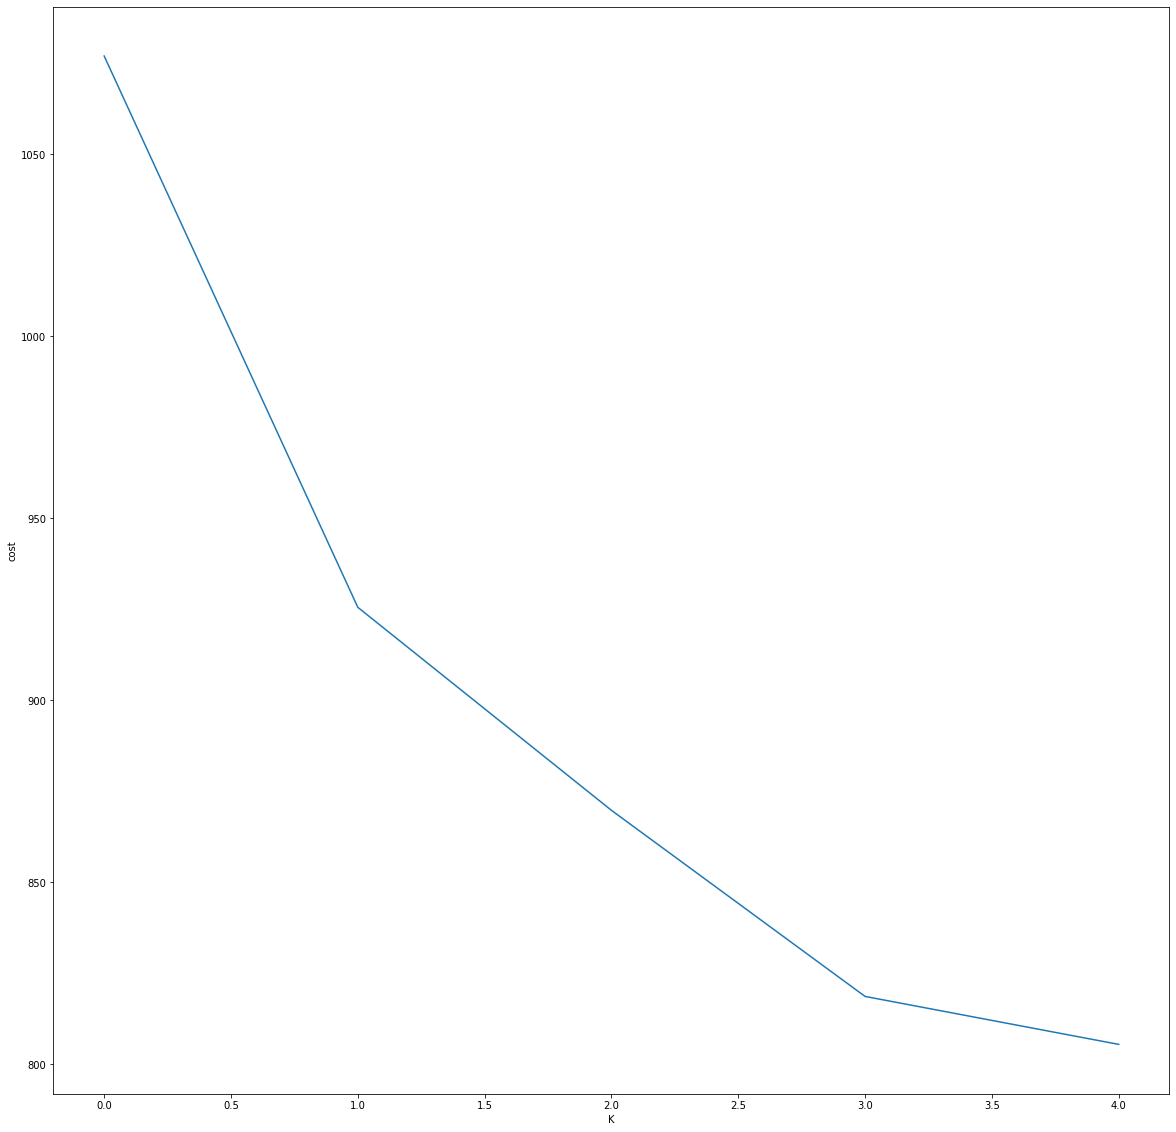

In [ ]:
#Choosing optimal K value
cost = []
X = df_cluster_norm
for num_clusters in list(range(2,7)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Huang') 
    kproto.fit_predict(X, categorical=[2,4,5])
    cost.append(kproto.cost_)

plt.plot(cost)
plt.xlabel('K')
plt.ylabel('cost')
plt.show

In [ ]:
kproto = KPrototypes(n_clusters=3, init='Huang')
clusters = kproto.fit_predict(df_cluster_norm, categorical=[2,4,5])
#join data with labels 
labels = pd.DataFrame(clusters)
labeled_df = pd.concat((df_cluster,labels),axis=1)
labeled_df = labeled_df.rename({0:'labels'},axis=1)

In [ ]:
labeled_df.head()

,Salary,Rating,Location_state,Size,Ownership,Sector,labels
0,128.109791,3.5,NY,750,Company - Private,Travel & Tourism,1
1,137.892012,4.5,NY,3000,Company - Private,Consumer Services,1
2,135.499555,3.4,NJ,350,Company - Private,Information Technology,1
3,141.501578,3.4,NY,125,Company - Private,Business Services,0
4,158.385494,2.9,NY,350,Company - Private,Insurance,1


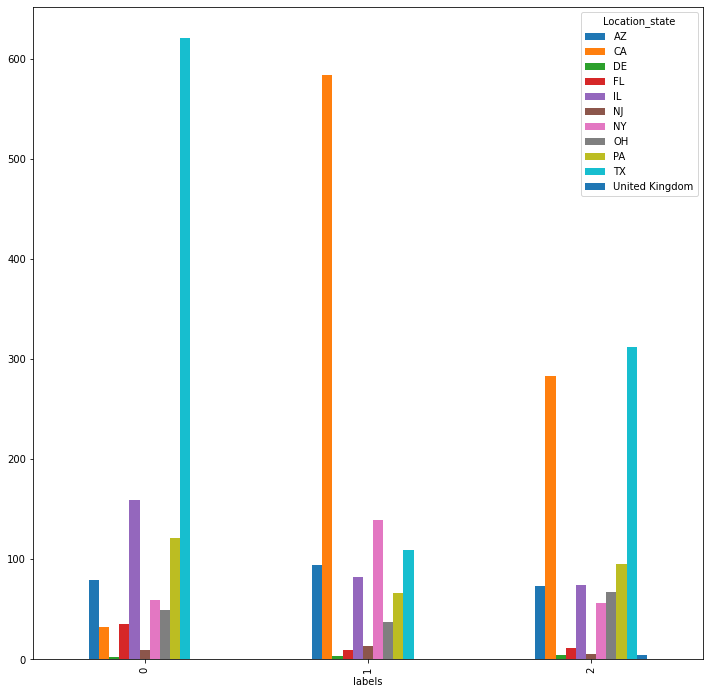

In [ ]:
labeled_df.groupby(['labels', 'Location_state']).size().unstack().plot(kind='bar',figsize=(12,12))
# clusters_state

In [ ]:
labeled_df.groupby(['labels', 'Location_state']).size()

labels  Location_state
0       AZ                 79
        CA                 32
        DE                  2
        FL                 35
        IL                159
        NJ                  9
        NY                 59
        OH                 49
        PA                121
        TX                621
1       AZ                 94
        CA                584
        DE                  3
        FL                  9
        IL                 82
        NJ                 13
        NY                139
        OH                 37
        PA                 66
        TX                109
2       AZ                 73
        CA                283
        DE                  4
        FL                 11
        IL                 74
        NJ                  5
        NY                 56
        OH                 67
        PA                 95
        TX                312
        United Kingdom      4
dtype: int64

<AxesSubplot:xlabel='labels'>

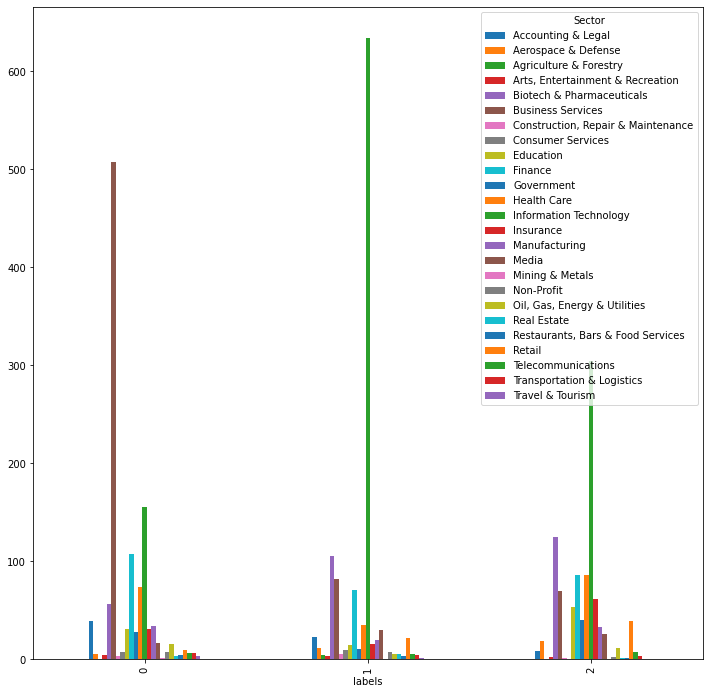

In [ ]:
labeled_df.groupby(['labels', 'Sector']).size().unstack().plot(kind='bar',figsize=(12,12))

In [ ]:
labeled_df.groupby(['labels', 'Sector']).size().unstack()

Sector,Accounting & Legal,Aerospace & Defense,Agriculture & Forestry,"Arts, Entertainment & Recreation",Biotech & Pharmaceuticals,Business Services,"Construction, Repair & Maintenance",Consumer Services,Education,Finance,...,Media,Mining & Metals,Non-Profit,"Oil, Gas, Energy & Utilities",Real Estate,"Restaurants, Bars & Food Services",Retail,Telecommunications,Transportation & Logistics,Travel & Tourism
labels,,,,,,,,,,,,,,,,,,,,,
0,39.0,6.0,NaN,5.0,57.0,508.0,4.0,8.0,31.0,108.0,...,17.0,1.0,8.0,16.0,3.0,5.0,10.0,7.0,7.0,3.0
1,23.0,12.0,5.0,3.0,106.0,82.0,6.0,10.0,15.0,71.0,...,30.0,NaN,8.0,6.0,6.0,3.0,22.0,6.0,5.0,1.0
2,9.0,19.0,NaN,2.0,125.0,70.0,1.0,NaN,53.0,86.0,...,26.0,NaN,2.0,12.0,1.0,1.0,39.0,8.0,4.0,NaN


<AxesSubplot:xlabel='labels'>

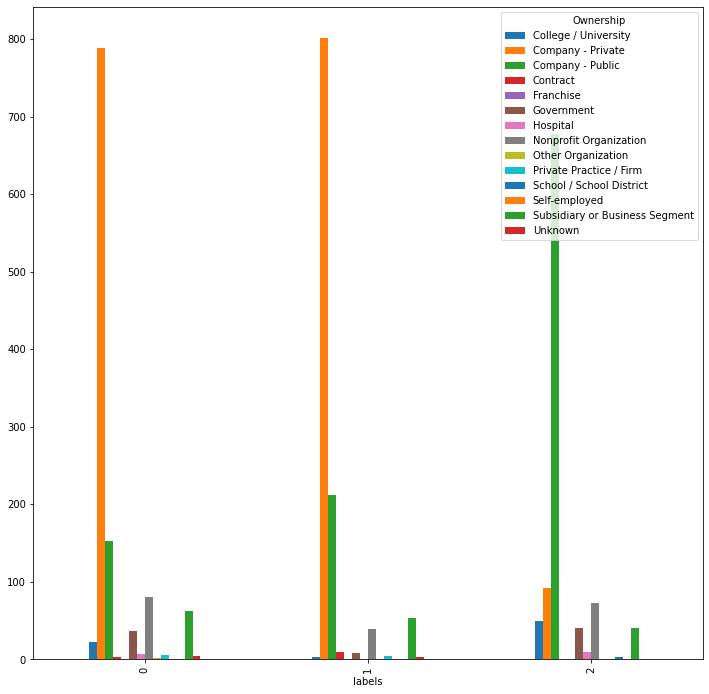

In [ ]:
labeled_df.groupby(['labels', 'Ownership']).size().unstack().plot(kind='bar',figsize=(12,12))

In [ ]:
labeled_df.groupby(['labels', 'Ownership']).size().unstack()

Ownership,College / University,Company - Private,Company - Public,Contract,Franchise,Government,Hospital,Nonprofit Organization,Other Organization,Private Practice / Firm,School / School District,Self-employed,Subsidiary or Business Segment,Unknown
labels,,,,,,,,,,,,,,
0,23.0,788.0,153.0,3.0,NaN,37.0,7.0,80.0,2.0,6.0,NaN,1.0,62.0,4.0
1,3.0,801.0,212.0,10.0,1.0,8.0,NaN,39.0,NaN,4.0,NaN,1.0,54.0,3.0
2,50.0,92.0,677.0,NaN,NaN,40.0,9.0,73.0,NaN,NaN,3.0,NaN,40.0,NaN


<AxesSubplot:title={'center':'Pie chart for cluster size'}, ylabel='None'>

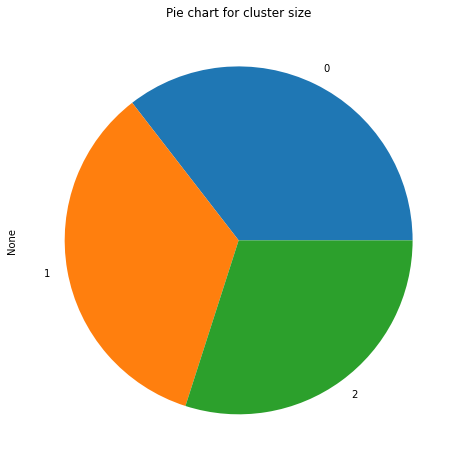

In [ ]:
pd.Series(clusters).value_counts().plot(kind="pie", title="Pie chart for cluster size", figsize=(8,8))

In [ ]:
labeled_df.head()

,Salary,Rating,Location_state,Size,Ownership,Sector,labels
0,0.548246,0.50,NY,0.036295,Company - Private,Travel & Tourism,1
1,0.548246,0.75,NY,0.148936,Company - Private,Consumer Services,1
2,0.653509,0.50,NJ,0.016270,Company - Private,Information Technology,1
3,0.609649,0.50,NY,0.005006,Company - Private,Business Services,2
4,0.548246,0.25,NY,0.016270,Company - Private,Insurance,1


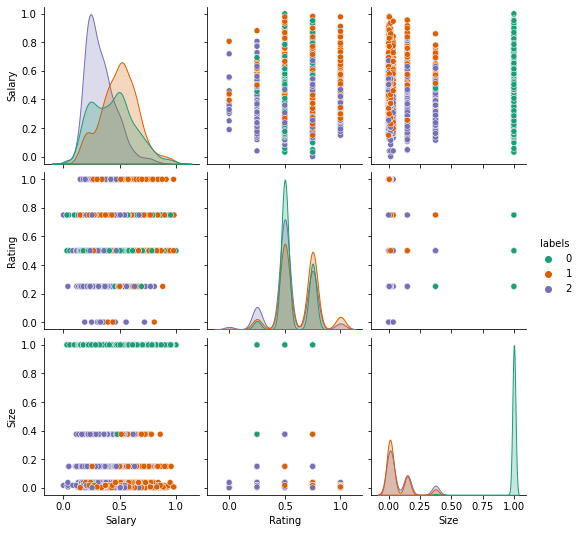

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(labeled_df,hue='labels',palette='Dark2',diag_kind='kde')

In conclusion, the three cluster has these attributes:

1. Group 0 company majorly is located in Texas, hiring in business service sector, is private-owned company, with very large size(10000+ employees), but they have relatively high rating and is not very generous in giving salary.
Tag:"Big, nice, but stingy" 

2. Group 1 is located in California, hiring in internet technology sector, private-owned company either, with relatively smaller size(compared to group 0) and higher salary, plus a higher rating.
Tag:"Small, nice, and generous"

3. Group 2 doesn't show a dominent location cluster (TX and CA take half-half). But the company is public. The size is relative similar to group 1, but the rating and salary level are both lower than group 1.
Tag:"Public, mean and stingy"

In [ ]:
!pip install dython

In [ ]:
df = pd.read_excel('DataScientist.xlsx')
df.rename(columns = {'Type of ownership':'Ownership','Salary Estimate':'Salary'}, inplace = True)
df['Salary'] = df['Salary'].apply(lambda x:x.split()[0])
df['Salary'] = df['Salary'].apply(lambda x:x.replace('$',''))
df['Salary'] = df['Salary'].apply(lambda x:x.replace('K',' '))
df['Salary'] = df['Salary'].apply(lambda x:x.replace('(Employer',' '))
df['Salary'] = df['Salary'].apply(sim)
city_state = df['Location'].str.split(',')
df['Location_state'] = np.nan
df['Location_city'] = np.nan
for i in range(len(city_state)):
  try:
    df.loc[i,'Location_state'] = city_state[i][1].strip()
    df.loc[i,'Location_city'] = city_state[i][0].strip()
  except:
    continue
df = df.dropna()
df = df[df['Rating'] != -1]
df = df[df['Sector'] != -1]
df = df[df['Size'] != 'Unknown']
df['Size'] = df['Size'].replace(['1 to 50 employees', '51 to 200 employees', '201 to 500 employees', '501 to 1000 employees', '1001 to 5000 employees', '5001 to 10000 employees', '10000+ employees'], 
                                [25, 125, 350, 750, 3000, 7500, 20000])
df.reset_index(inplace=True, drop=True)
df_cluster = df[['Salary', 'Rating', 'Location_state', 'Location_city', 'Size', 'Ownership', 'Sector']]

In [ ]:
for y in df_cluster.columns:
    if(df_cluster[y].dtype == np.float64):
        df_cluster[y] = df_cluster[y].astype(int)

df_cluster.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Salary             int64
Rating             int64
Location_state    object
Location_city     object
Size               int64
Ownership         object
Sector            object
dtype: object

In [ ]:
# from dython.model_utils import roc_graph
from dython.nominal import associations

def associations_example():
    associations(df_cluster,nominal_columns=['Location_state', 'Location_city', 'Size', 'Ownership', 'Sector'])

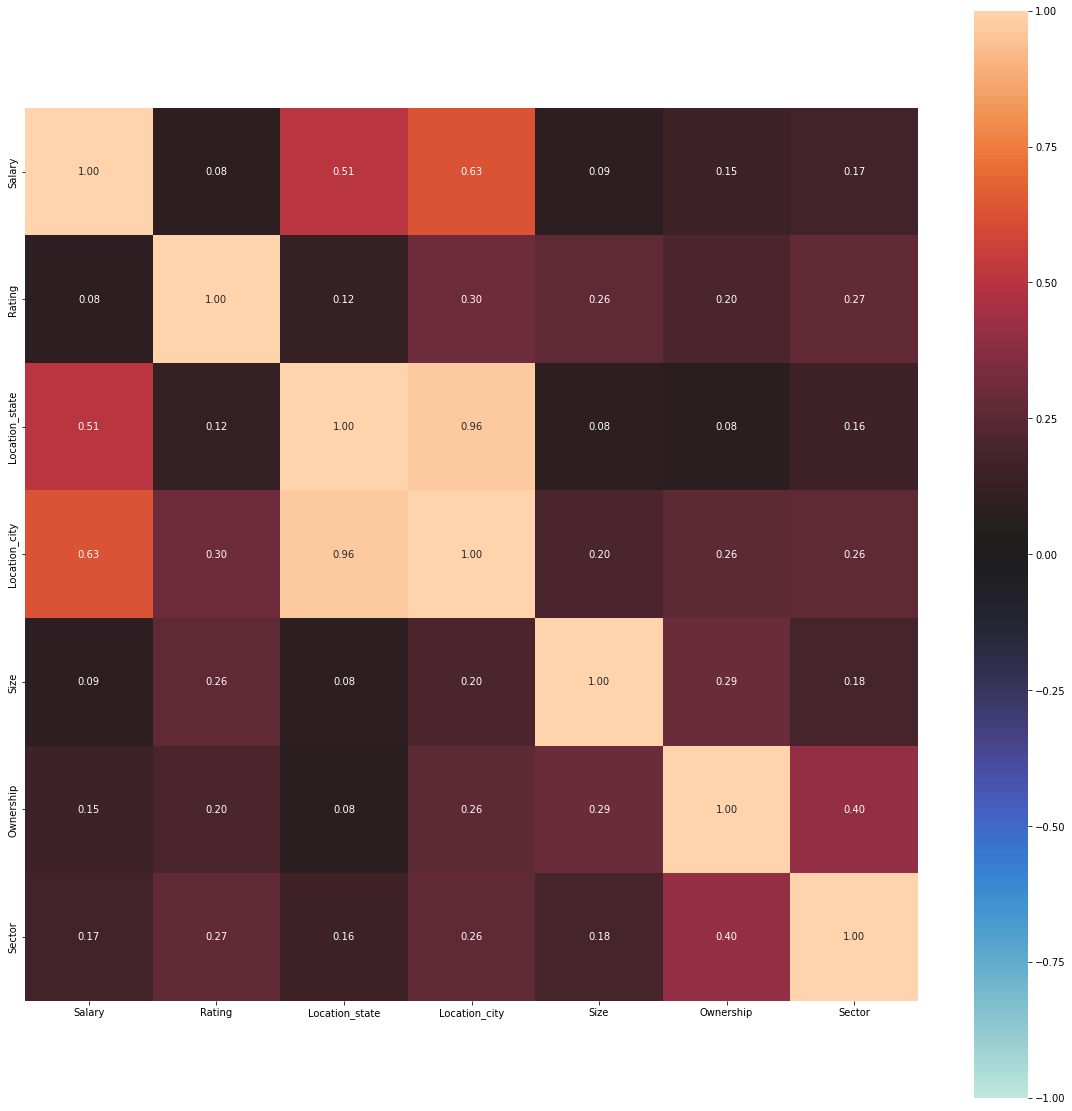

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=20,20
associations_example()

In [ ]:
# Standardizing all the numerical variables
from sklearn import preprocessing
Num_features=df_cluster.select_dtypes(include=[np.number]).columns
df_cluster[Num_features]=preprocessing.MinMaxScaler().fit_transform(df_cluster[Num_features])
df_cluster.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Salary,Rating,Location_state,Size,Ownership,Sector
0,0.548246,0.50,NY,0.036295,Company - Private,Travel & Tourism
1,0.548246,0.75,NY,0.148936,Company - Private,Consumer Services
2,0.653509,0.50,NJ,0.016270,Company - Private,Information Technology
3,0.609649,0.50,NY,0.005006,Company - Private,Business Services
4,0.548246,0.25,NY,0.016270,Company - Private,Insurance


In [ ]:
#Hopkins Statistic is a way of measuring the cluster tendency of a data set.
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [ ]:
Num_features =df_cluster.select_dtypes(include=[np.number]).columns
hopkins(df_cluster[Num_features])

0.9894595243706376

Result: This test is run (code: (MATEVZKUNAVER, 2017)) on all the numerical variables of the entire dataset and the test statistic we got is 0.99 which indicates that data has a high tendency to cluster.